In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import math

In [2]:
def load_image(img_path):
    image = Image.open(img_path)
    return image

In [3]:
image = load_image('Lenna_(test_image).png')
image = image.convert('L')

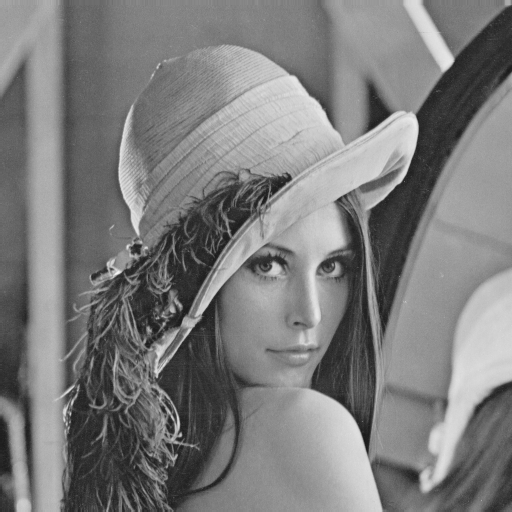

In [4]:
image

In [5]:
img_array = np.array(image)
img_array

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [6]:
img_array.shape

(512, 512)

# Niblack binarization

In [7]:
np.std(img_array)

np.float64(47.85553021846798)

In [8]:
img_array[0:3, 3:5]

array([[161, 162],
       [161, 162],
       [161, 162]], dtype=uint8)

In [9]:
def niblack_binarizaiton(img_array, win_size, k):
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            std = np.std(img_array[i:i+win_size, j:j+win_size])
            mean = np.mean(img_array[i:i+win_size, j:j+win_size])
            threshold = mean + k*std
            
            if img_array[i,j] > threshold:
                img_array[i,j] = 255
            else:
                img_array[i,j] = 0
                
    return img_array
         

In [10]:
win_size = 15
k = 0.5
niblack_binarized = niblack_binarizaiton(img_array, win_size, k)

In [11]:
niblack_binarized

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [12]:
niblack_binarized_image = Image.fromarray(niblack_binarized)
niblack_binarized_image.show()

# Sauvola Binarization

In [13]:
def sauvola_binarizaiton(img_array, win_size, k, R):
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            std = np.std(img_array[i:i+win_size, j:j+win_size])
            mean = np.mean(img_array[i:i+win_size, j:j+win_size])
            sauvola_threshold = mean*(1+k*(std/R - 1))
            
            if img_array[i,j] > sauvola_threshold:
                img_array[i,j] = 255
            else:
                img_array[i,j] = 0
                
    return img_array

In [14]:
win_size = 15
k = 0.5
R = 128

In [15]:
sauvola_binarized = sauvola_binarizaiton(img_array, win_size, k, R)

In [16]:
sauvola_binarized_image = Image.fromarray(sauvola_binarized)
sauvola_binarized_image.show()

# Phansalkar binarization

In [17]:
def phansalkar_binarizaiton(img_array, win_size, k, R, p, q):
    e = math.e
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            std = np.std(img_array[i:i+win_size, j:j+win_size])
            mean = np.mean(img_array[i:i+win_size, j:j+win_size])
            phansalkar_threshold = mean*(1+ p*e**(-q*mean) + k*(std/R - 1))
            
            if img_array[i,j] > phansalkar_threshold:
                img_array[i,j] = 255
            else:
                img_array[i,j] = 0
                
    return img_array

In [18]:
win_size = 40
k = 0.25 #best results in article
R = 128
q=4 # from article
p = 3 #from article

In [19]:
phansalkar_binarized = phansalkar_binarizaiton(img_array, win_size, k, R, p, q)

In [20]:
phansalkar_binarized_img = Image.fromarray(phansalkar_binarized)

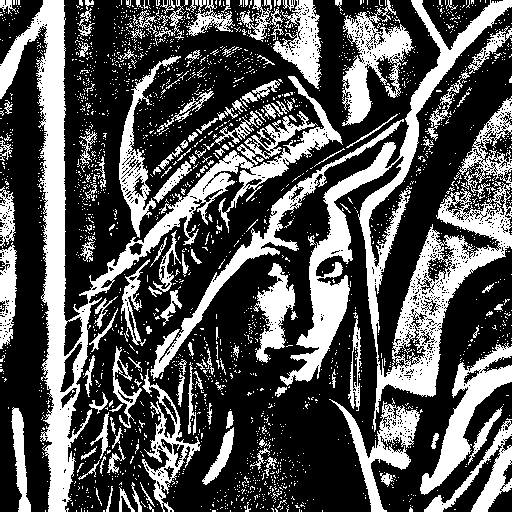

In [21]:
phansalkar_binarized_img

# Our binarization algorithm

In [33]:
def our_binarization_algorithm(img_array, huge_win, small_win, p, q):
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            huge_win_var = np.var(img_array[i:i+huge_win, j:j+huge_win])
            small_win_var = np.var(img_array[i:i+small_win, j:j+small_win])
            
            if small_win_var > huge_win_var:
                std = np.std(img_array[i:i+huge_win, j:j+huge_win])
                mean = np.mean(img_array[i:i+huge_win, j:j+huge_win])
            else:
                std = np.std(img_array[i:i+small_win, j:j+small_win])
                mean = np.mean(img_array[i:i+small_win, j:j+small_win])
                
            threshold = 0.125*mean*(abs(1 - k*std) + p**(q-1))**2
            
            if img_array[i,j] > threshold:
                img_array[i,j] = 255
            else:
                img_array[i,j] = 0
                
    return img_array

In [34]:
huge_win = 40
small_win = 10
p = 3
q = 0.5

In [35]:
original_binarized = our_binarization_algorithm(img_array, huge_win, small_win, p, q)

In [42]:
original_binarized_img = Image.fromarray(original_binarized)

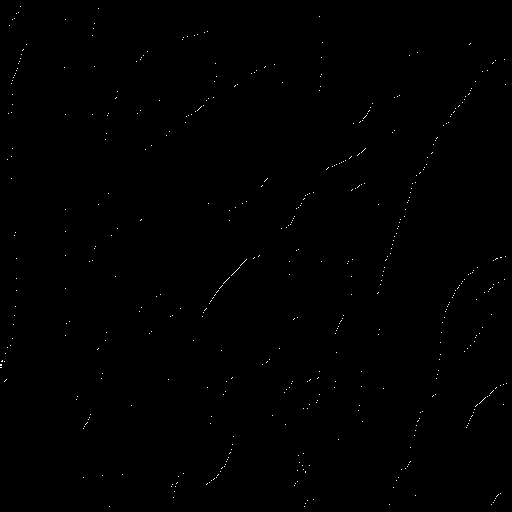

In [43]:
original_binarized_img